In [ ]:
import pandas as pd
import glob

print("="*60)
print("MERGING ALL MONTHLY DATA FILES")
print("="*60)

# Get all Excel files
file_pattern = 'DISTRIBUSI FM SALES_2025*.xlsx'
all_files = glob.glob(file_pattern)
all_files.sort()  # Sort by filename (chronological order)

print(f"\nFound {len(all_files)} files:")
for i, file in enumerate(all_files, 1):
    print(f"  {i}. {file}")

# Read and combine all files
df_list = []
for file in all_files:
    print(f"\nReading: {file}...")
    temp_df = pd.read_excel(file)
    
    # Add month identifier
    month = file.split('_')[-1].replace('.xlsx', '')  # Extract '202501', '202502', etc
    temp_df['data_month'] = month
    
    df_list.append(temp_df)
    print(f"  → Rows: {len(temp_df):,}")

# Combine all dataframes
df = pd.concat(df_list, ignore_index=True)

print("\n" + "="*60)
print("MERGING SUMMARY")
print("="*60)
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Date Range: {df['data_month'].min()} to {df['data_month'].max()}")


output_file = 'combined_data_followupsales_2025.csv'
df.to_csv(output_file, index=False)

print("\n" + "="*60)
print("✅ MERGING COMPLETE!")
print("="*60)
print(f"Output File: {output_file}")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")

MERGING ALL MONTHLY DATA FILES

Found 7 files:
  1. DISTRIBUSI FM SALES_202501.xlsx
  2. DISTRIBUSI FM SALES_202502.xlsx
  3. DISTRIBUSI FM SALES_202503.xlsx
  4. DISTRIBUSI FM SALES_202504.xlsx
  5. DISTRIBUSI FM SALES_202505.xlsx
  6. DISTRIBUSI FM SALES_202506.xlsx
  7. DISTRIBUSI FM SALES_202507.xlsx

Reading: DISTRIBUSI FM SALES_202501.xlsx...
  → Rows: 713,943

Reading: DISTRIBUSI FM SALES_202502.xlsx...
  → Rows: 369,045

Reading: DISTRIBUSI FM SALES_202503.xlsx...
  → Rows: 312,579

Reading: DISTRIBUSI FM SALES_202504.xlsx...
  → Rows: 229,419

Reading: DISTRIBUSI FM SALES_202505.xlsx...
  → Rows: 162,289

Reading: DISTRIBUSI FM SALES_202506.xlsx...
  → Rows: 187,373

Reading: DISTRIBUSI FM SALES_202507.xlsx...
  → Rows: 269,315

MERGING SUMMARY
Total Rows: 2,243,963
Total Columns: 30
Date Range: 202501 to 202507

✅ MERGING COMPLETE!
Output File: combined_data_followupsales_2025.csv
Total Rows: 2,243,963
Total Columns: 30


# Phase 2 

## Data Understanding

### Section 1 

SECTION 1: DATA OVERVIEW

1.1 BASIC INFORMATION
Shape: 2,243,963 rows × 30 columns
Memory: 1782.14 MB
Period: 202501 to 202507

1.2 DUPLICATE CHECK
Duplicates: 0 rows (0.00%)

1.3 MONTHLY DISTRIBUTION
data_month
202501    713943
202502    369045
202503    312579
202504    229419
202505    162289
202506    187373
202507    269315
Name: count, dtype: int64


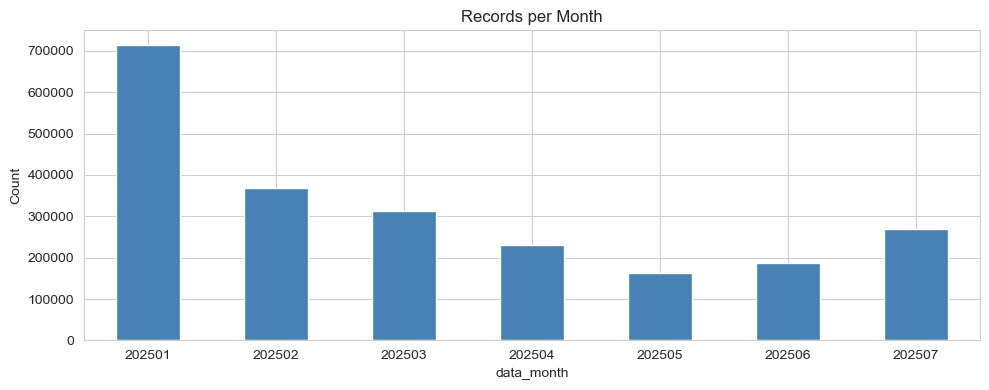


1.4 COLUMN SUMMARY
            Column    Type  Non_Null   Null  Null_%  Unique
               r_n   int64   2243963      0    0.00       1
              r_ng   int64   2243963      0    0.00       1
            r_nuug   int64   2243963      0    0.00       1
             r_nuu   int64   2243963      0    0.00       1
           cust_no   int64   2243963      0    0.00 2014001
periode_first_dist   int64   2243963      0    0.00       7
           is_book  object   2243963      0    0.00       2
      last_type_fu  object   2018929 225034   10.03       2
           appl_no  object   2243963      0    0.00 2029669
       contract_no   int64   2243963      0    0.00 2029441
         buss_unit  object   2243963      0    0.00       2
          cust_sex  object   2243963      0    0.00       2
      marital_stat  object   2243963      0    0.00       4
              usia   int64   2243963      0    0.00      62
          edu_type  object   2243963      0    0.00       8
      no_of_depend f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("="*60)
print("SECTION 1: DATA OVERVIEW")
print("="*60)

# Load data
df = pd.read_csv('combined_data_followupsales_2025.csv')

# ============================================================
# 1.1 BASIC INFO
# ============================================================
print("\n1.1 BASIC INFORMATION")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Period: {df['data_month'].min()} to {df['data_month'].max()}")

# ============================================================
# 1.2 DUPLICATES
# ============================================================
print("\n1.2 DUPLICATE CHECK")
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates:,} rows ({duplicates/len(df)*100:.2f}%)")

# ============================================================
# 1.3 MONTHLY DISTRIBUTION
# ============================================================
print("\n1.3 MONTHLY DISTRIBUTION")
monthly = df['data_month'].value_counts().sort_index()
print(monthly)

# Plot
plt.figure(figsize=(10, 4))
monthly.plot(kind='bar', color='steelblue')
plt.title('Records per Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# 1.4 COLUMN SUMMARY
# ============================================================
print("\n1.4 COLUMN SUMMARY")
summary = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values,
    'Non_Null': df.notna().sum().values,
    'Null': df.isna().sum().values,
    'Null_%': (df.isna().sum() / len(df) * 100).values.round(2),
    'Unique': [df[col].nunique() for col in df.columns]
})
print(summary.to_string(index=False))

print("\n" + "="*60)
print("✅ SECTION 1 COMPLETE")
print("="*60)

### Section 2

SECTION 2: TARGET VARIABLES ANALYSIS

2.1 STAGE 1 TARGET: last_type_fu (Channel Recommendation)
------------------------------------------------------------

Distribution:
Channel   Count  Percentage
      P 1384051       68.55
      V  634878       31.45

Missing: 225,034 rows (10.03%)


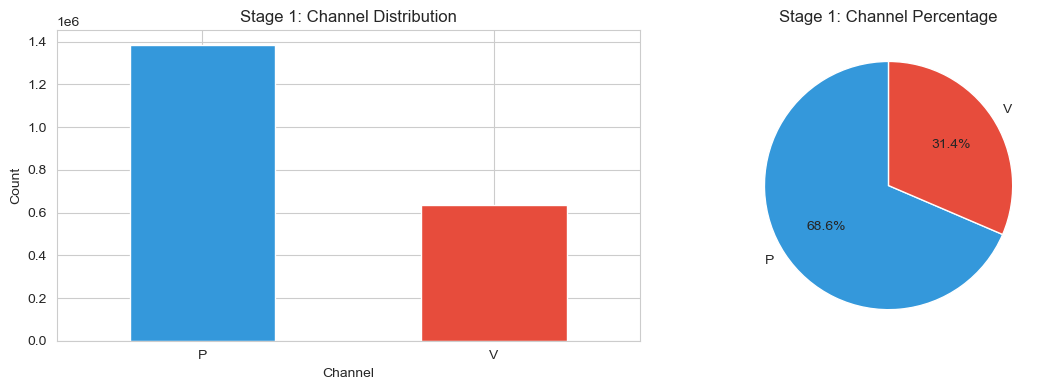


2.2 STAGE 2 TARGET: is_book (Booking Success)
------------------------------------------------------------

Distribution:
    Status   Count  Percentage
NO_BOOKING 1923281       85.71
   BOOKING  320682       14.29

Missing: 0 rows (0.00%)


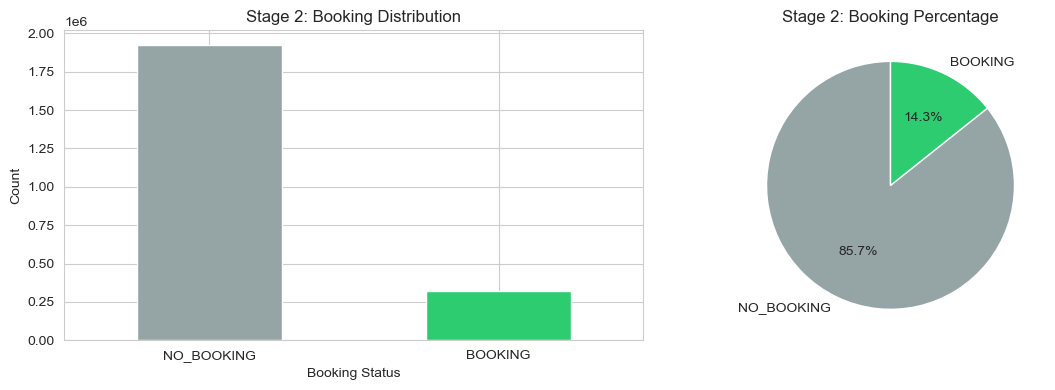


2.3 CHANNEL vs BOOKING (Two-Stage Relationship)
------------------------------------------------------------

Cross-tabulation:
is_book       BOOKING  NO_BOOKING      All
last_type_fu                              
P              166267     1217784  1384051
V               87921      546957   634878
All            254188     1764741  2018929

Conversion Rate by Channel:
is_book       BOOKING  NO_BOOKING
last_type_fu                     
P               12.01       87.99
V               13.85       86.15


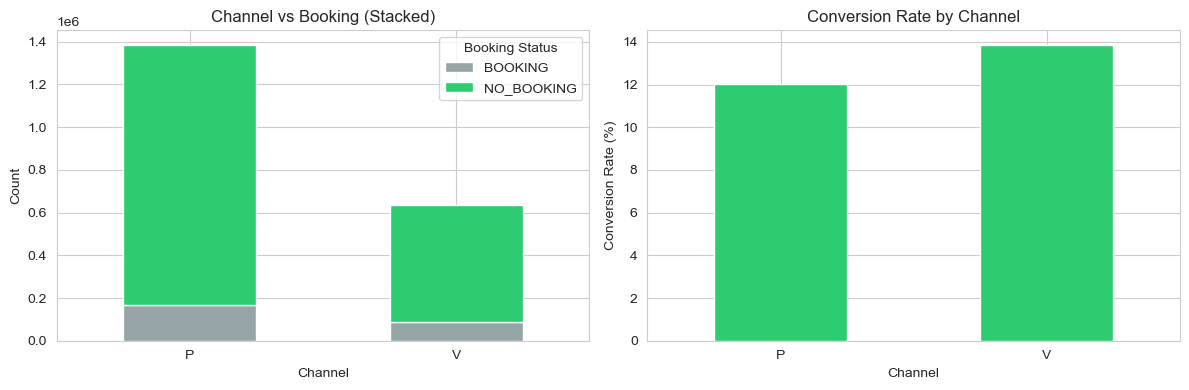


2.4 MONTHLY TRENDS
------------------------------------------------------------

Channel Distribution per Month:
last_type_fu       P       V
data_month                  
202501        421677  202871
202502        235744  100934
202503        193806   89957
202504        151102   64018
202505        100963   49407
202506        114206   57223
202507        166553   70468

Booking Distribution per Month:
is_book     BOOKING  NO_BOOKING
data_month                     
202501        72309      641634
202502        59746      309299
202503        53402      259177
202504        26556      202863
202505        39843      122446
202506        32174      155199
202507        36652      232663

Monthly Conversion Rate (%):
data_month
202501    10.13
202502    16.19
202503    17.08
202504    11.58
202505    24.55
202506    17.17
202507    13.61
Name: BOOKING, dtype: float64


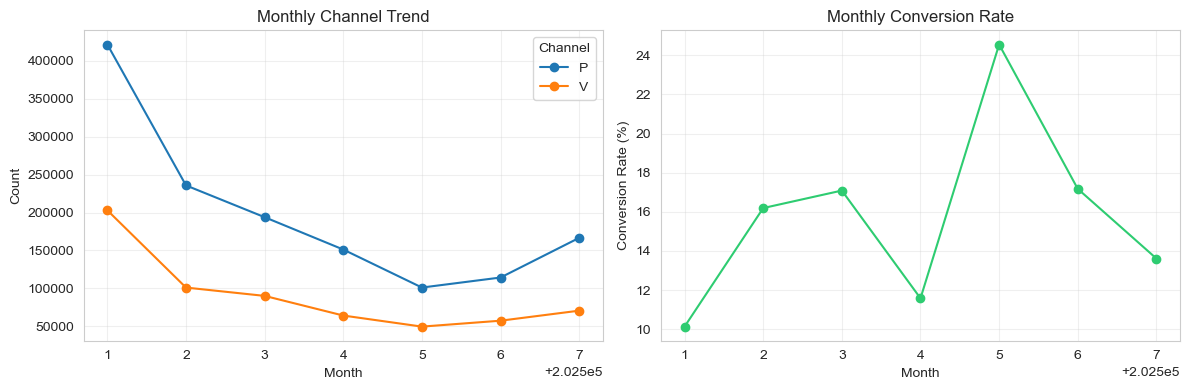


2.5 KEY INSIGHTS
------------------------------------------------------------

Stage 1 (Channel):
  - PHONE: 68.6%
  - VISIT: 31.4%
  - Missing: 10.0%
  - Balance: Imbalanced

Stage 2 (Booking):
  - BOOKING: 14.3%
  - NO_BOOKING: 85.7%
  - Imbalance Ratio: 1:6.0
  - SMOTE Needed: Yes

Overall:
  - Total Records: 2,243,963
  - Usable for Stage 1: 2,018,929
  - Conversion Rate: 14.29%

SECTION 2 COMPLETE


In [4]:
print("="*60)
print("SECTION 2: TARGET VARIABLES ANALYSIS")
print("="*60)

# ============================================================
# 2.1 STAGE 1 TARGET: last_type_fu
# ============================================================
print("\n2.1 STAGE 1 TARGET: last_type_fu (Channel Recommendation)")
print("-"*60)

# Distribution
print("\nDistribution:")
stage1_dist = df['last_type_fu'].value_counts()
stage1_pct = df['last_type_fu'].value_counts(normalize=True) * 100
stage1_summary = pd.DataFrame({
    'Channel': stage1_dist.index,
    'Count': stage1_dist.values,
    'Percentage': stage1_pct.values.round(2)
})
print(stage1_summary.to_string(index=False))

# Missing values
missing_s1 = df['last_type_fu'].isna().sum()
print(f"\nMissing: {missing_s1:,} rows ({missing_s1/len(df)*100:.2f}%)")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
stage1_dist.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Stage 1: Channel Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Channel')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(stage1_pct.values, labels=stage1_pct.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Stage 1: Channel Percentage')

plt.tight_layout()
plt.show()

# ============================================================
# 2.2 STAGE 2 TARGET: is_book
# ============================================================
print("\n2.2 STAGE 2 TARGET: is_book (Booking Success)")
print("-"*60)

# Distribution
print("\nDistribution:")
stage2_dist = df['is_book'].value_counts()
stage2_pct = df['is_book'].value_counts(normalize=True) * 100
stage2_summary = pd.DataFrame({
    'Status': stage2_dist.index,
    'Count': stage2_dist.values,
    'Percentage': stage2_pct.values.round(2)
})
print(stage2_summary.to_string(index=False))

# Missing values
missing_s2 = df['is_book'].isna().sum()
print(f"\nMissing: {missing_s2:,} rows ({missing_s2/len(df)*100:.2f}%)")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
stage2_dist.plot(kind='bar', ax=axes[0], color=['#95a5a6', '#2ecc71'])
axes[0].set_title('Stage 2: Booking Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Booking Status')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
colors = ['#95a5a6', '#2ecc71']
axes[1].pie(stage2_pct.values, labels=stage2_pct.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Stage 2: Booking Percentage')

plt.tight_layout()
plt.show()

# ============================================================
# 2.3 CHANNEL vs BOOKING (Cross-tabulation)
# ============================================================
print("\n2.3 CHANNEL vs BOOKING (Two-Stage Relationship)")
print("-"*60)

# Cross-tab
crosstab = pd.crosstab(df['last_type_fu'], df['is_book'], margins=True)
print("\nCross-tabulation:")
print(crosstab)

# Conversion rate by channel
print("\nConversion Rate by Channel:")
conv_rate = pd.crosstab(df['last_type_fu'], df['is_book'], normalize='index') * 100
print(conv_rate.round(2))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Stacked bar
crosstab_no_margin = pd.crosstab(df['last_type_fu'], df['is_book'])
crosstab_no_margin.plot(kind='bar', stacked=True, ax=axes[0], 
                        color=['#95a5a6', '#2ecc71'])
axes[0].set_title('Channel vs Booking (Stacked)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Channel')
axes[0].legend(title='Booking Status')
axes[0].tick_params(axis='x', rotation=0)

# Conversion rate
conv_rate_booking = conv_rate['BOOKING'] if 'BOOKING' in conv_rate.columns else conv_rate.iloc[:, 1]
conv_rate_booking.plot(kind='bar', ax=axes[1], color='#2ecc71')
axes[1].set_title('Conversion Rate by Channel')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_xlabel('Channel')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# ============================================================
# 2.4 MONTHLY TRENDS
# ============================================================
print("\n2.4 MONTHLY TRENDS")
print("-"*60)

# Channel trend
print("\nChannel Distribution per Month:")
monthly_channel = pd.crosstab(df['data_month'], df['last_type_fu'])
print(monthly_channel)

# Booking trend
print("\nBooking Distribution per Month:")
monthly_booking = pd.crosstab(df['data_month'], df['is_book'])
print(monthly_booking)

# Conversion rate trend
print("\nMonthly Conversion Rate (%):")
monthly_conv = pd.crosstab(df['data_month'], df['is_book'], normalize='index') * 100
monthly_conv_rate = monthly_conv['BOOKING'] if 'BOOKING' in monthly_conv.columns else monthly_conv.iloc[:, 1]
print(monthly_conv_rate.round(2))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Channel trend
monthly_channel.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Monthly Channel Trend')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Month')
axes[0].legend(title='Channel')
axes[0].grid(alpha=0.3)

# Conversion rate trend
monthly_conv_rate.plot(kind='line', marker='o', ax=axes[1], color='#2ecc71')
axes[1].set_title('Monthly Conversion Rate')
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_xlabel('Month')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 2.5 KEY INSIGHTS
# ============================================================
print("\n2.5 KEY INSIGHTS")
print("-"*60)

# Calculate key metrics
phone_pct = stage1_pct.get('P', 0)
visit_pct = stage1_pct.get('V', 0)
booking_pct = stage2_pct.get('BOOKING', 0)
no_booking_pct = stage2_pct.get('NO_BOOKING', 0)

print(f"""
Stage 1 (Channel):
  - PHONE: {phone_pct:.1f}%
  - VISIT: {visit_pct:.1f}%
  - Missing: {missing_s1/len(df)*100:.1f}%
  - Balance: {'Balanced' if abs(phone_pct - visit_pct) < 20 else 'Imbalanced'}

Stage 2 (Booking):
  - BOOKING: {booking_pct:.1f}%
  - NO_BOOKING: {no_booking_pct:.1f}%
  - Imbalance Ratio: 1:{no_booking_pct/booking_pct:.1f}
  - SMOTE Needed: {'Yes' if booking_pct < 30 else 'No'}

Overall:
  - Total Records: {len(df):,}
  - Usable for Stage 1: {len(df) - missing_s1:,}
  - Conversion Rate: {booking_pct:.2f}%
""")

print("="*60)
print("SECTION 2 COMPLETE")
print("="*60)